In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [42]:
df = pd.read_csv('drugsCom.csv')

In [43]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


### Count the number of reviews for each drug and find the drug with the most reviews

In [44]:
df.isnull().any()

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [45]:
df.isnull().sum()

uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [46]:
most_reviewed_drug = df['drugName'].value_counts().idxmax()

most_reviewed_drug


'Levonorgestrel'

### Find the drug with the highest rating

In [47]:
highest_rated_drug = df.loc[df['rating'].idxmax(), 'drugName']
highest_rated_drug

'Mirtazapine'

### Calculate the average rating for all drugs

In [48]:
average_rating = df['rating'].mean()
average_rating

6.97689989956478

### Count the number of reviews for each condition and find the most common one

In [49]:
most_common_condition = df['condition'].value_counts().idxmax()
most_common_condition

'Birth Control'

### Find the drug with the highest number of useful counts

In [50]:
most_useful_drug = df.loc[df['usefulCount'].idxmax(), 'drugName']
most_useful_drug

'Sertraline'

### calculate the correlation between a drug's rating and its usefulness count

In [51]:
correlation = df['rating'].corr(df['usefulCount'])
correlation

0.2368972307481001

### The distribution of ratings for the drug Bactrim 

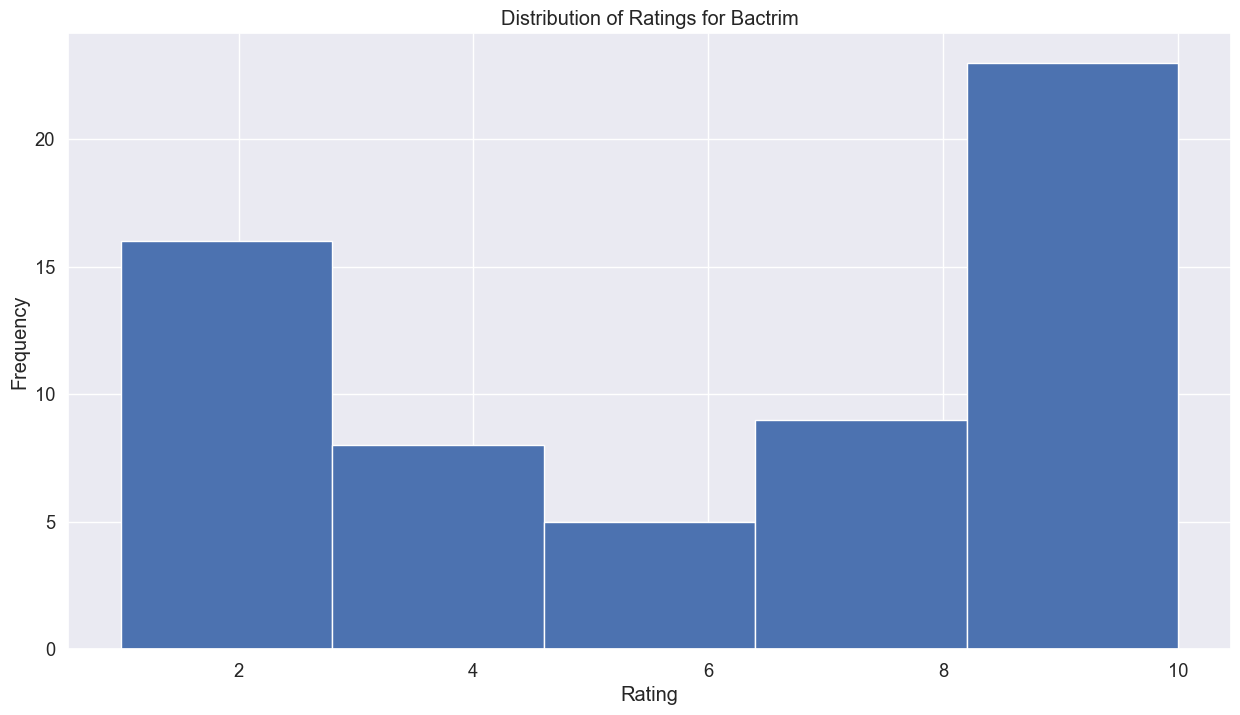

In [52]:
bactrim_reviews = df[df['drugName'] == 'Bactrim']
plt.hist(bactrim_reviews['rating'], bins=5)
plt.title('Distribution of Ratings for Bactrim')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### Median rating for drugs used to treat depression

In [53]:
# Filter the dataframe to only include drugs used to treat depression
depression_df = df[df['condition'] == 'Depression']

# Calculate the median rating for these drugs
median_rating = depression_df['rating'].median()
median_rating

8.0

### Most commonly used drug for migraine prevention

In [54]:
# Filter the dataframe to only include drugs used for migraine prevention
migraine_df = df[df['condition'] == 'Migraine Prevention']

# Count the number of occurrences of each drug in the dataframe
drug_counts = migraine_df['drugName'].value_counts()

# Get the drug with the highest count
most_common_drug = drug_counts.index[0]
most_common_drug

'Topiramate'

### Top 20 Drugs That have 10/10 rating

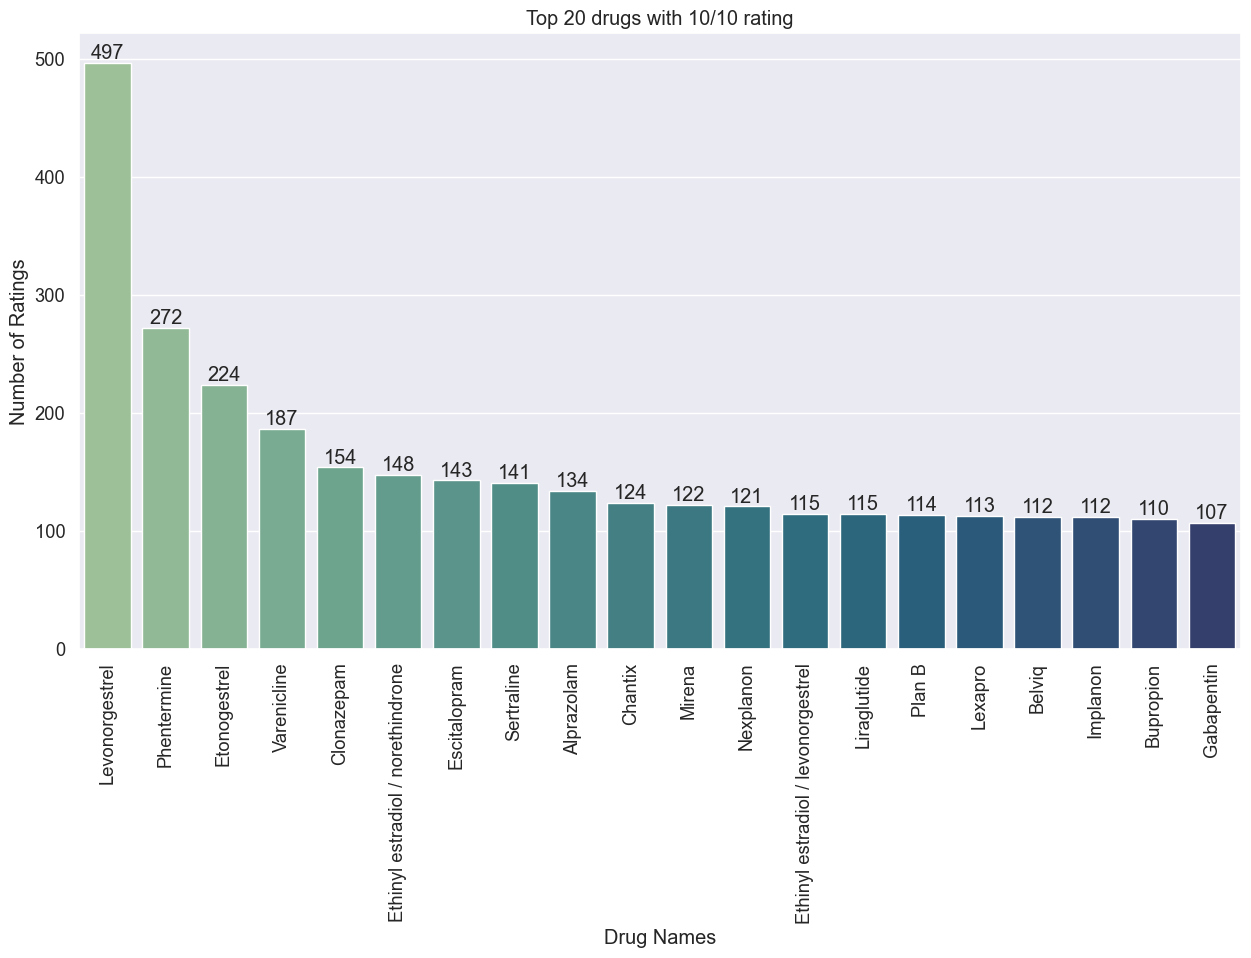

In [55]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df.loc[df.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'crest')

for i in sns_rating.containers:
    sns_rating.bar_label(i,)

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()

### Top 20 drugs with 1/10 ratings

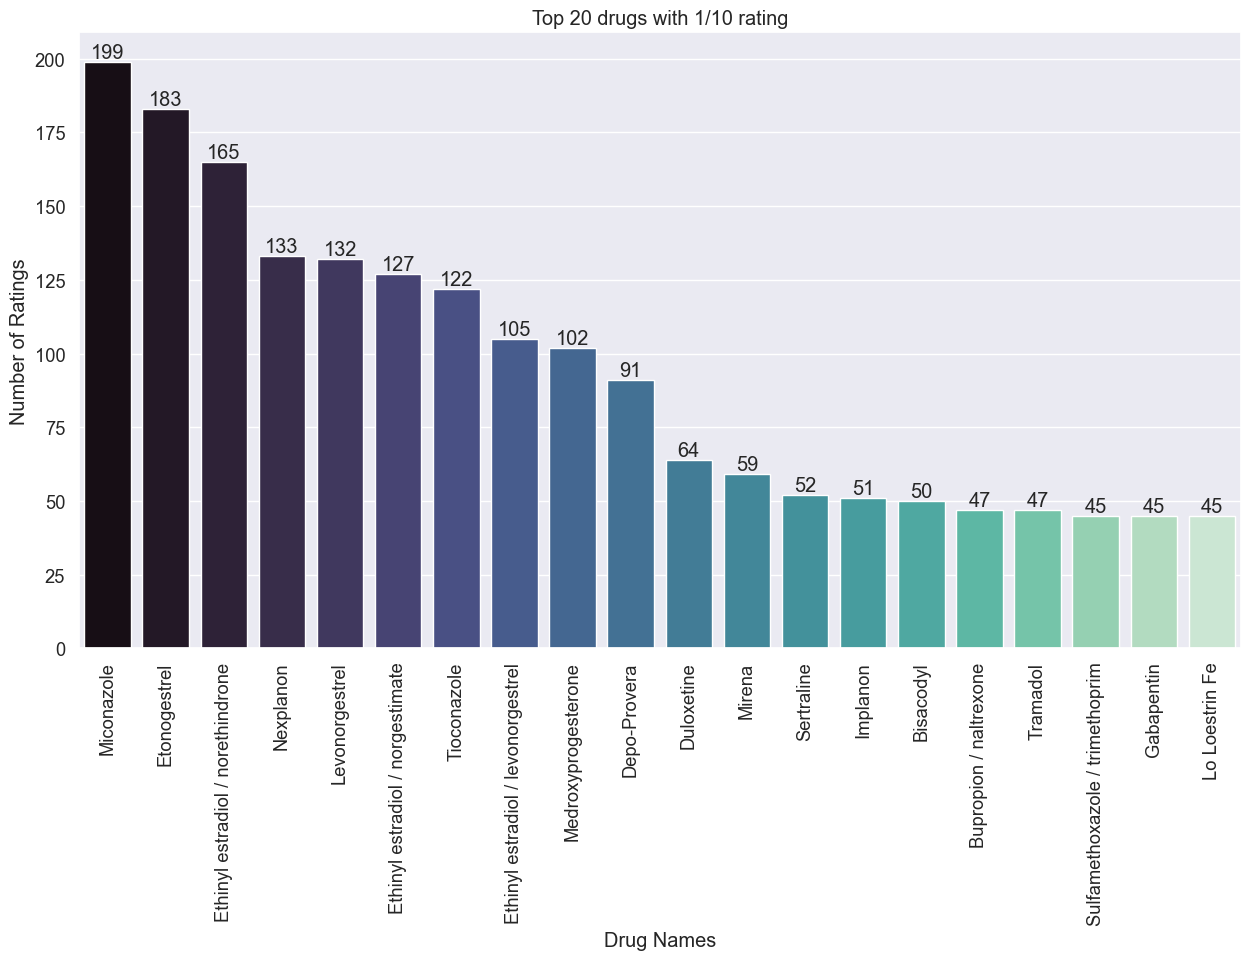

In [72]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df.loc[df.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'mako')

for i in sns_rating.containers:
    sns_rating.bar_label(i,)

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()

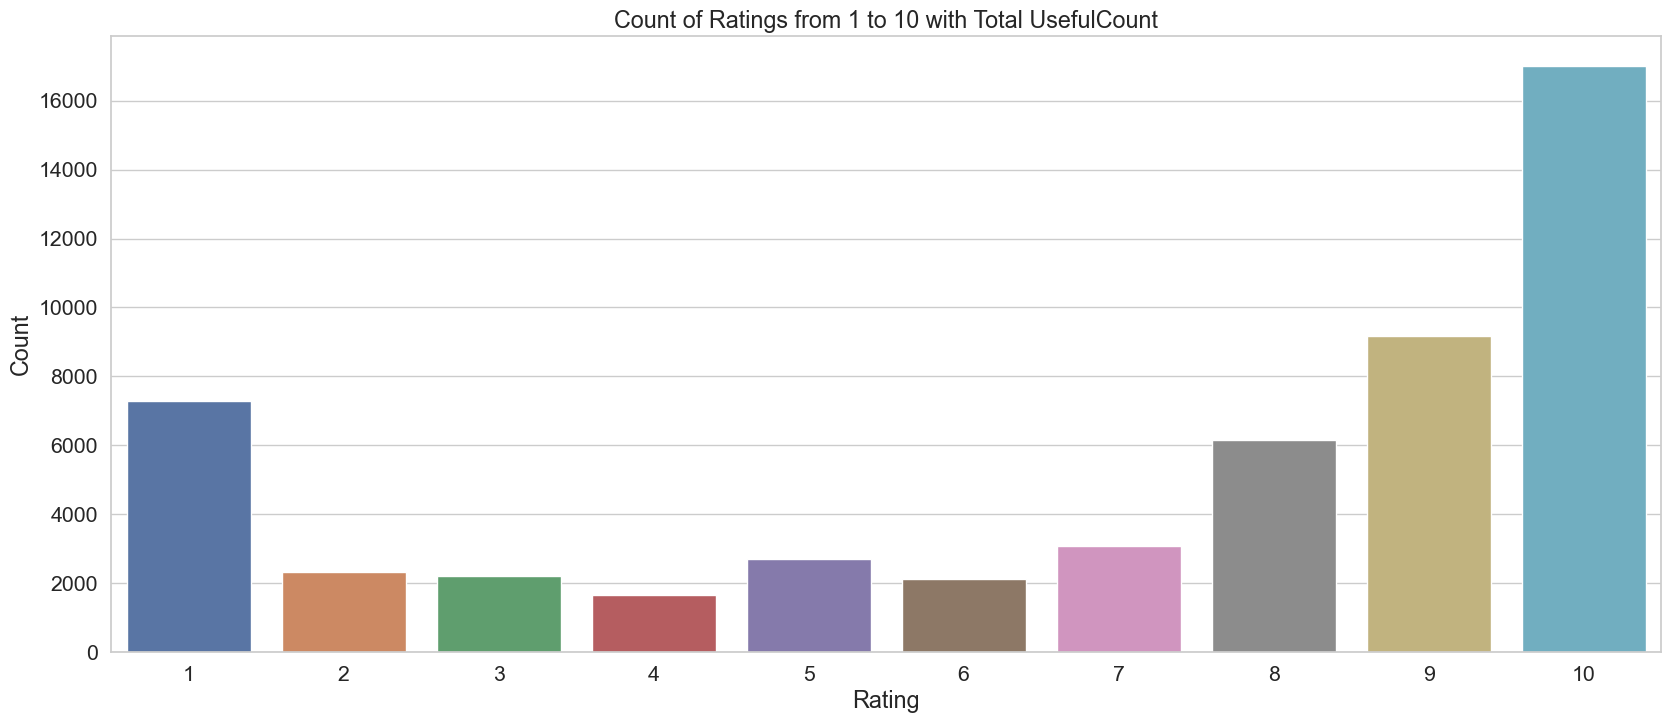

In [83]:
# Create countplot
sns.countplot(x='rating', data=df)

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Ratings from 1 to 10 with Total UsefulCount')
plt.show()

<AxesSubplot:xlabel='rating', ylabel='count'>

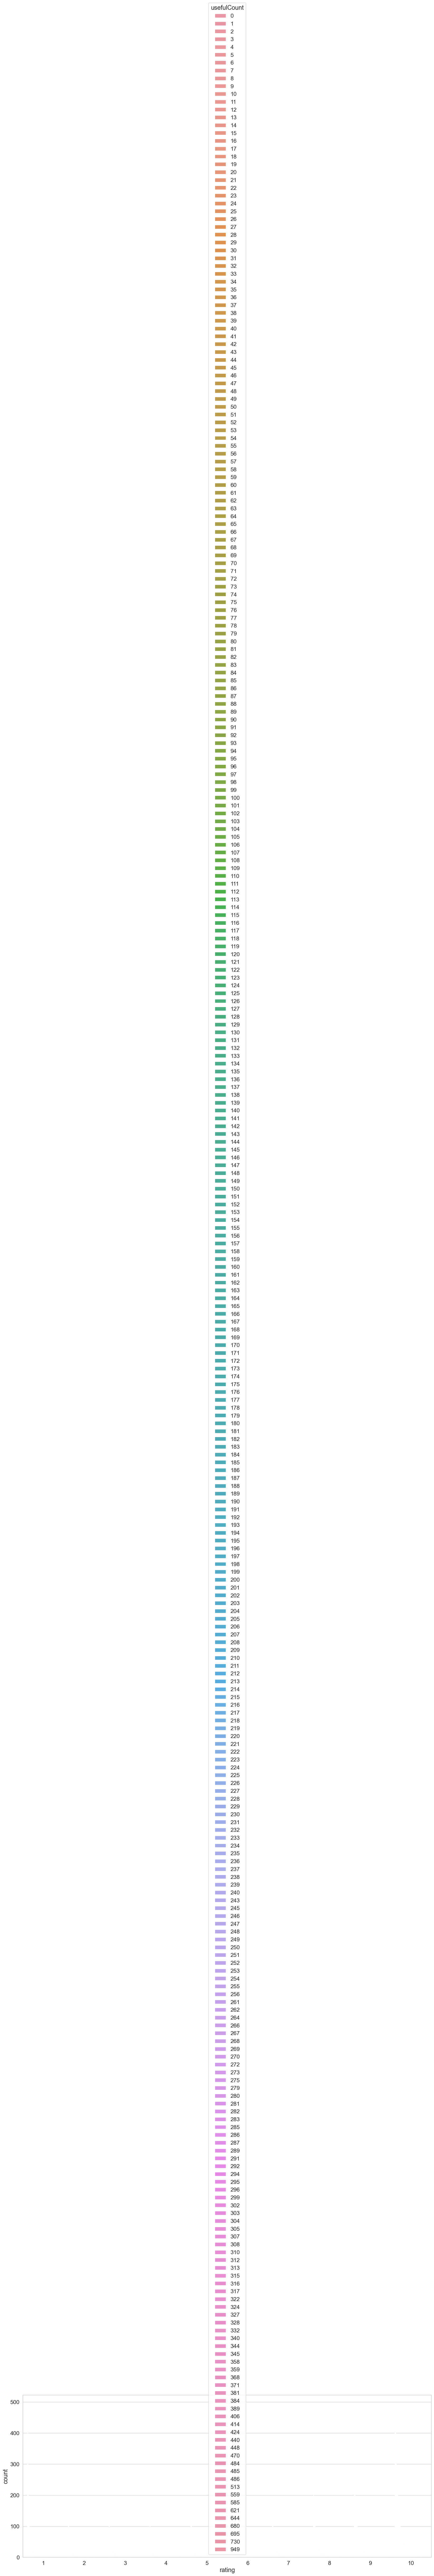

In [84]:
sns.countplot(x='rating', hue='usefulCount', data=df)

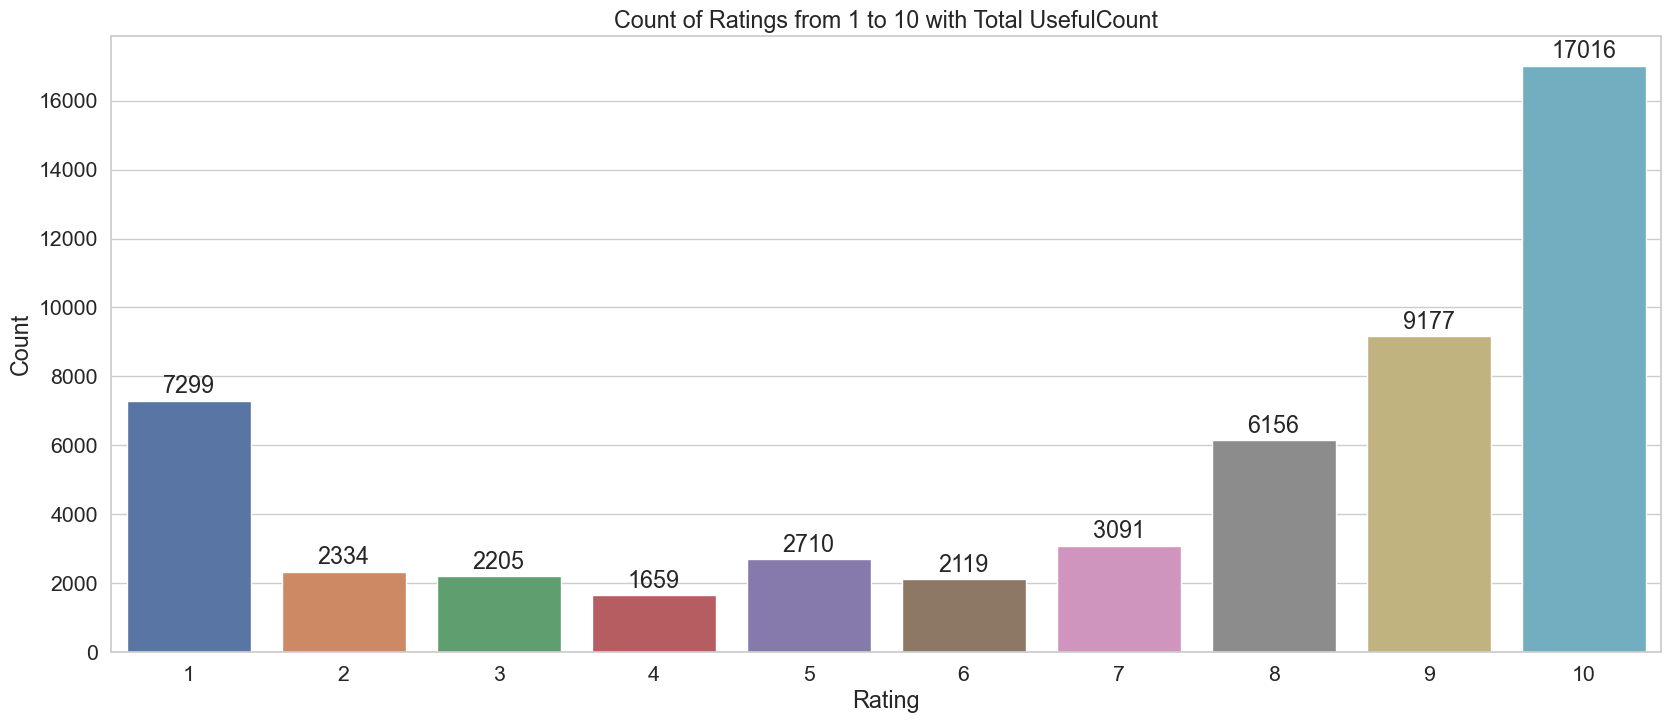

In [85]:
# Create countplot
ax = sns.countplot(x='rating', data=df)

# Add count labels to bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Ratings from 1 to 10 with Total UsefulCount')
plt.show()

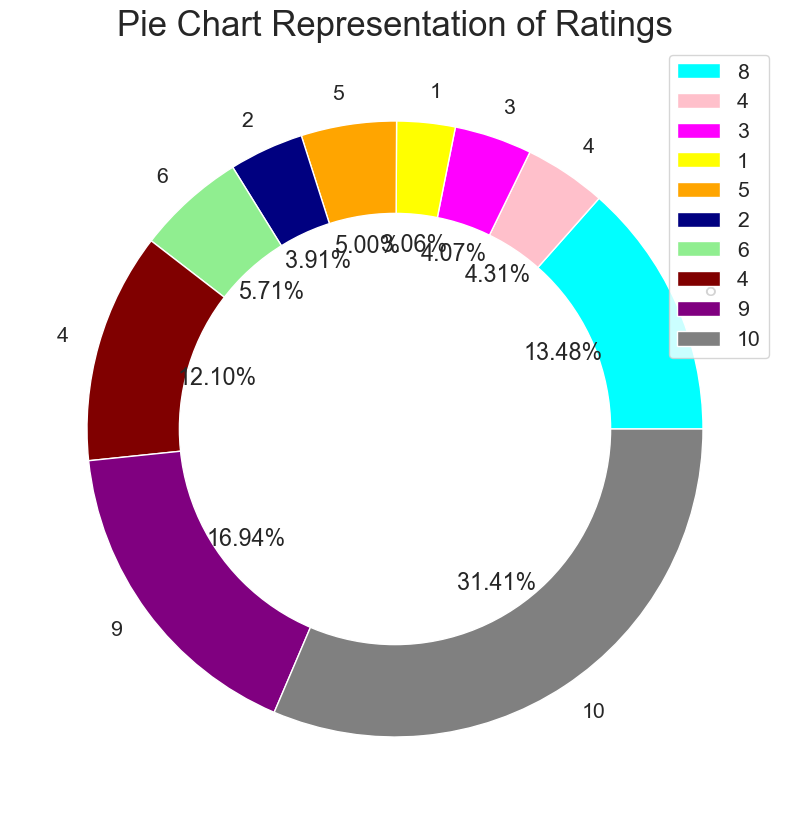

In [87]:
size = [7299, 2334, 2205, 1659, 2710, 2119, 3091, 6556, 9177, 17016]
colors = ['cyan', 'pink', 'magenta',  'yellow', 'orange', 'navy', 'lightgreen', 'maroon', 'purple', 'gray']
labels = "8", "4", "3", "1", "5", "2", "6", "4", "9", "10"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

### Top 10 Conditions for which people take drugs

Text(0, 0.5, 'Count')

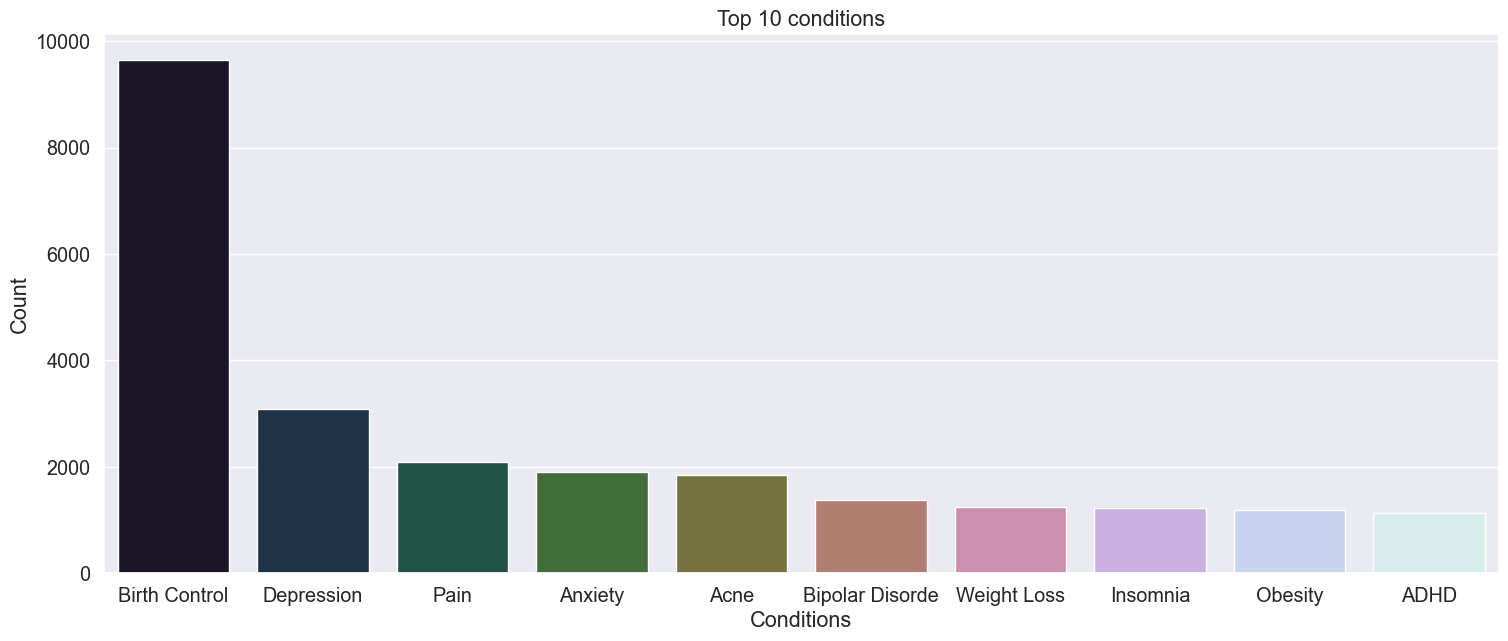

In [89]:
cond = dict(df['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'cubehelix')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count")

### Top 10 Drugs Used For Birth Control

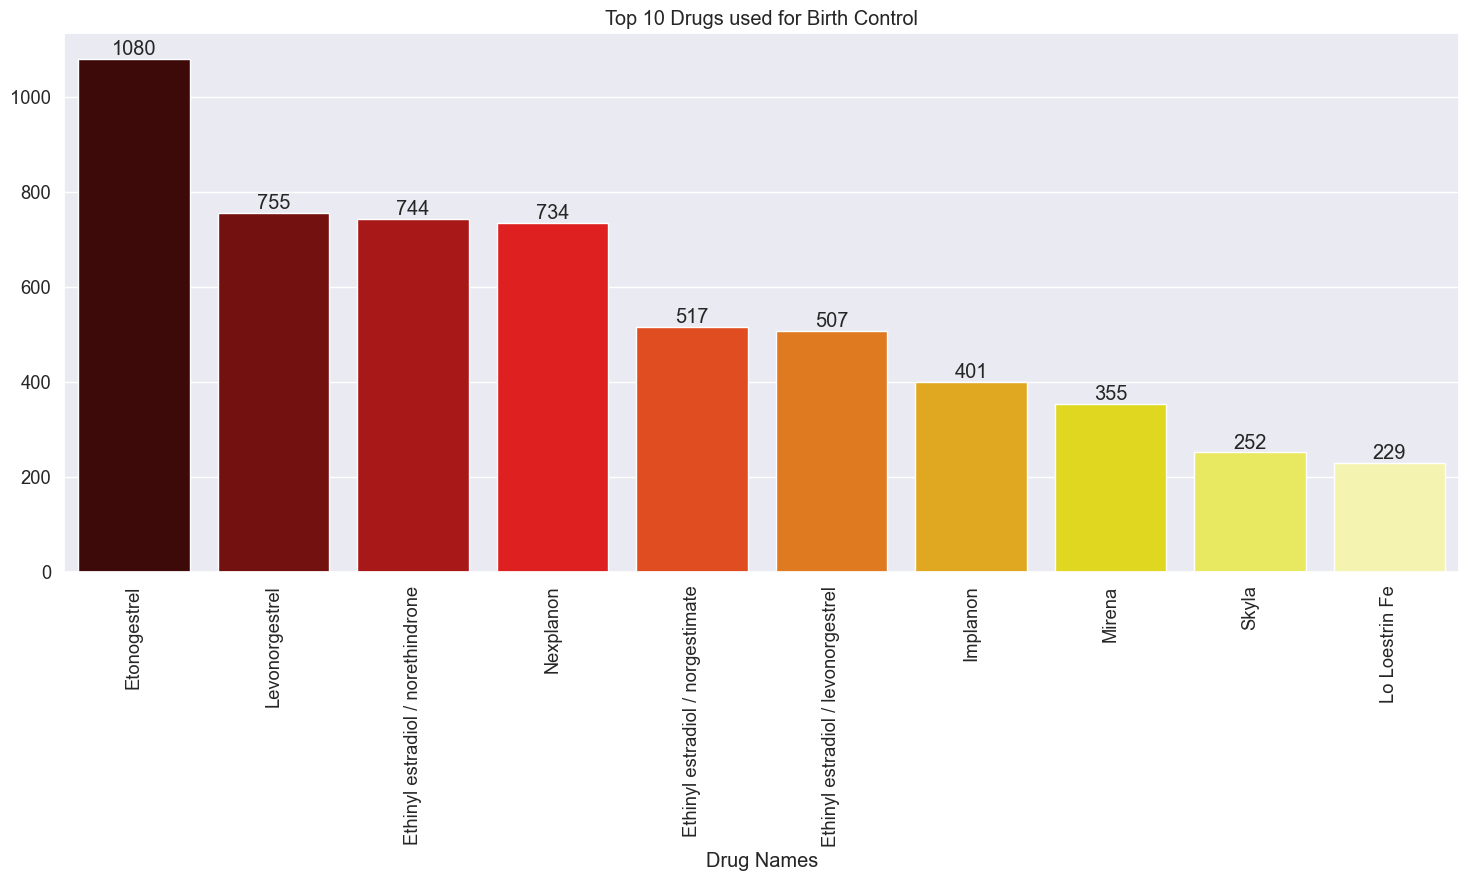

In [92]:
df1 = df[df['condition'] == 'Birth Control']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'hot')

for i in sns_.containers:
    sns_.bar_label(i,)
    
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90)
plt.show()

In [95]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [97]:
df['date'] = pd.to_datetime(df['date'])

In [98]:
df['year'] = df['date'].dt.year

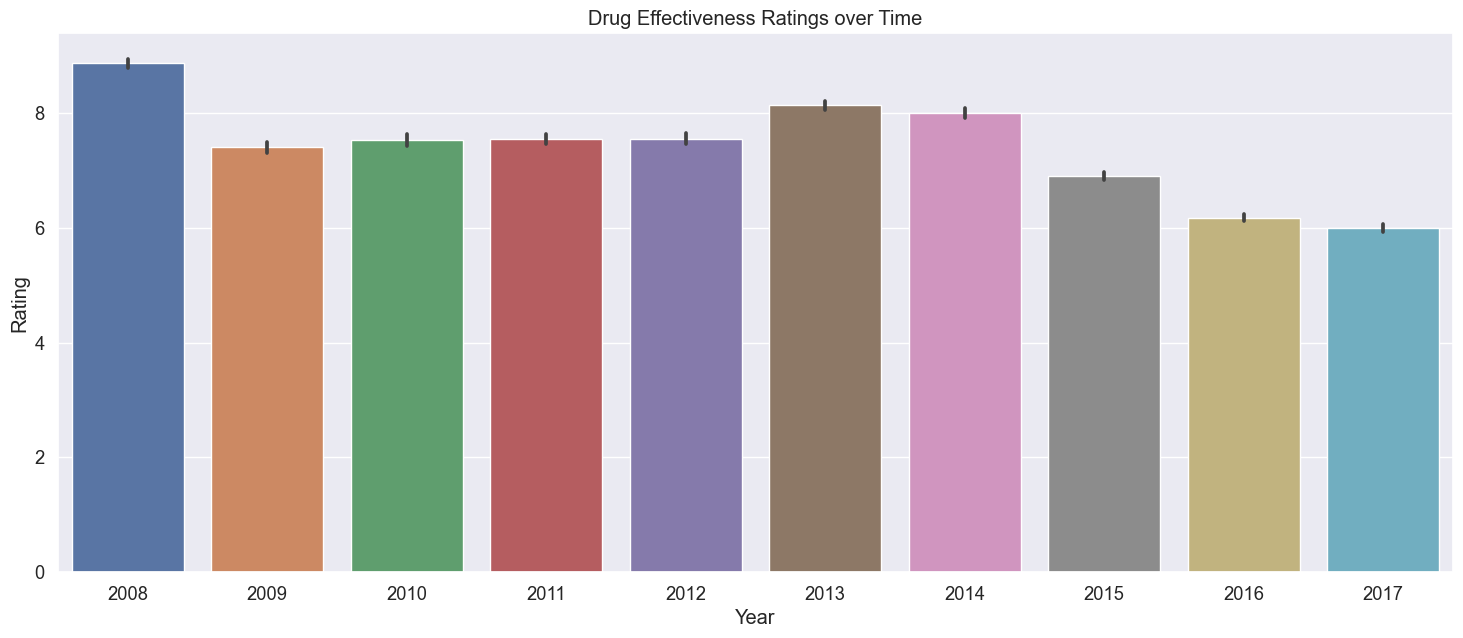

In [99]:
sns.barplot(x='year', y='rating', data=df)

# set the plot title and axis labels
plt.title('Drug Effectiveness Ratings over Time')
plt.xlabel('Year')
plt.ylabel('Rating')

# display the plot
plt.show()

### Filter the data for a specific medical condition and drug

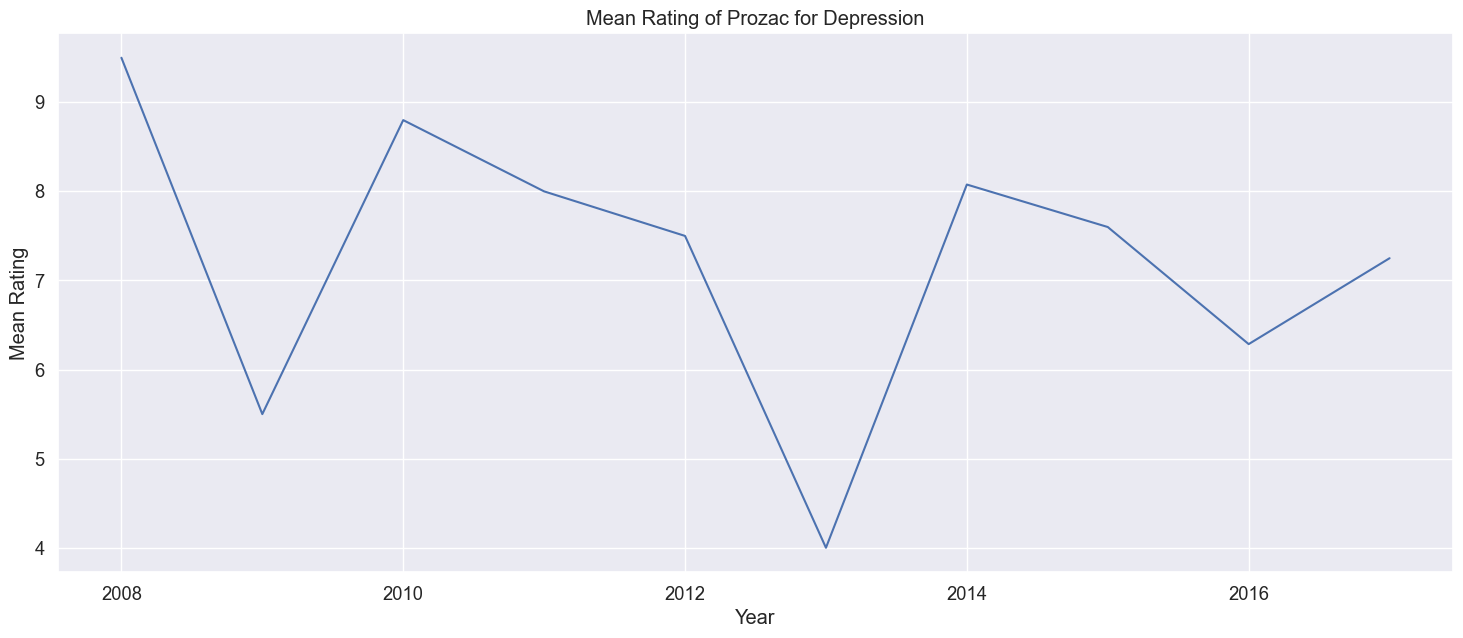

In [106]:
medical_condition = 'Depression'
drug_name = 'Prozac'
filtered_data = df[(df['condition'] == medical_condition) & (df['drugName'] == drug_name)]

# Convert the date column to a datetime format
filtered_data['date'] = pd.to_datetime(filtered_data['date'], format='%d-%b-%y')

# Extract the year from the date column
filtered_data['Year'] = filtered_data['date'].dt.year

# Calculate the mean rating for each year
mean_ratings = filtered_data.groupby('Year')['rating'].mean().reset_index()

# Plot the data using a seaborn lineplot
sns.lineplot(x='Year', y='rating', data=mean_ratings)

# Set the title and axis labels
plt.title(f'Mean Rating of {drug_name} for {medical_condition}')
plt.xlabel('Year')
plt.ylabel('Mean Rating')

# Display the plot
plt.show()

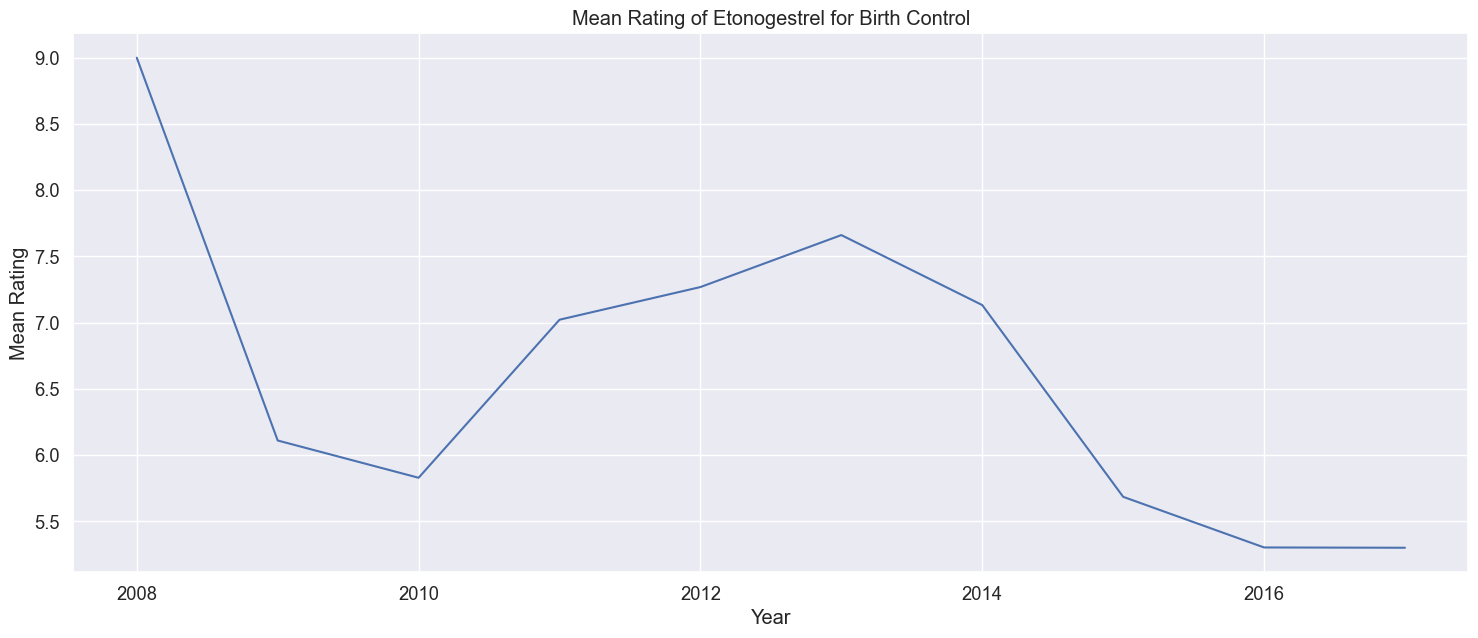

In [107]:
medical_condition = 'Birth Control'
drug_name = 'Etonogestrel'
filtered_data = df[(df['condition'] == medical_condition) & (df['drugName'] == drug_name)]

# Convert the date column to a datetime format
filtered_data['date'] = pd.to_datetime(filtered_data['date'], format='%d-%b-%y')

# Extract the year from the date column
filtered_data['Year'] = filtered_data['date'].dt.year

# Calculate the mean rating for each year
mean_ratings = filtered_data.groupby('Year')['rating'].mean().reset_index()

# Plot the data using a seaborn lineplot
sns.lineplot(x='Year', y='rating', data=mean_ratings)

# Set the title and axis labels
plt.title(f'Mean Rating of {drug_name} for {medical_condition}')
plt.xlabel('Year')
plt.ylabel('Mean Rating')

# Display the plot
plt.show()

## Model Building

In [122]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [123]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['review'])
y = df['rating']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [126]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f'Train score: {train_score:.3f}, Test score: {test_score:.3f}')

Train score: 0.804, Test score: -1.561


<AxesSubplot:ylabel='rating'>

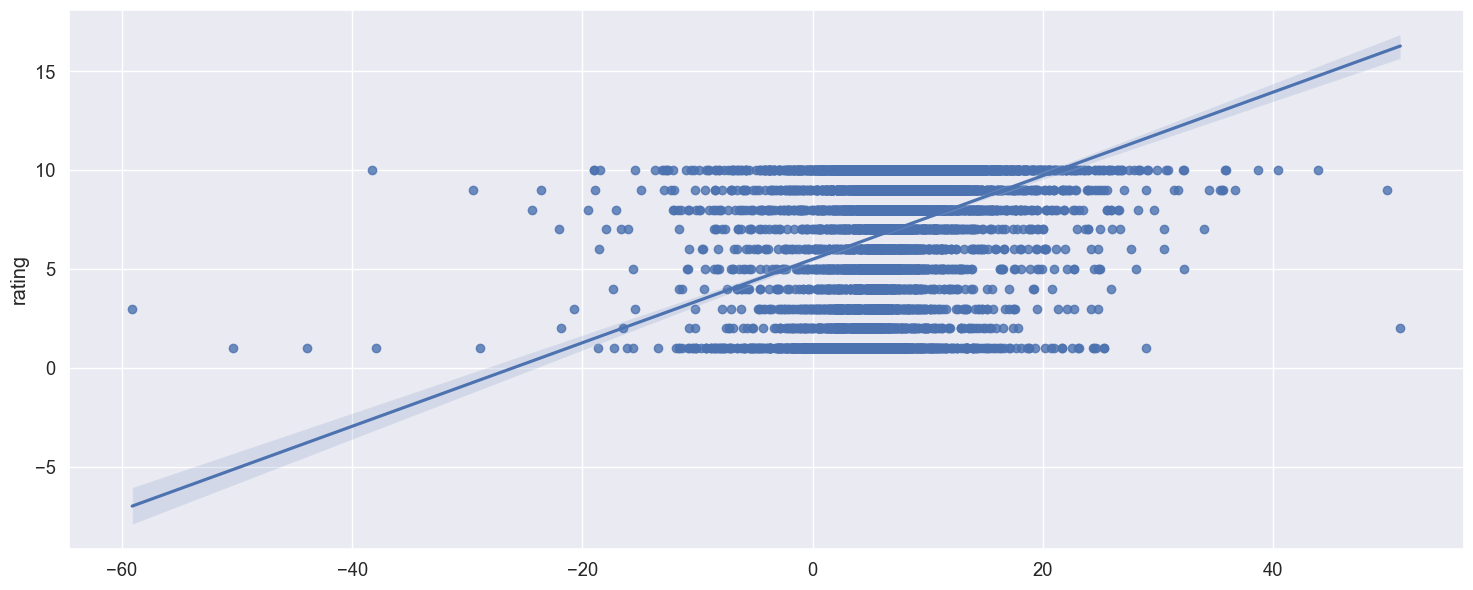

In [127]:
sns.regplot(x=model.predict(X_test), y=y_test)